# ANALISIS DE VENTAS DE VEHICULOS

## Abstracto con motivación y audiencia

Actualmente, la industria automotriz crece de manera constante, cada vez son más personas entre hombres y mujeres que desean tener su propio vehículo, sin embargo, muchas de estas personas no toman la decisión por falta de un buen asesoramiento por parte de las distribuidoras y comercializadoras de vehículos.

Estas compañías automotrices manejan cientos de miles de datos de personas interesadas en comprar un vehículo, sin embargo, muchas de estas compañías no clasifican, ni realizan una segmentación de los clientes potenciales para generar una venta efectiva, por esta razón se pierde mucho tiempo y dinero en recursos humanos y técnicos sin obtener una venta final efectiva. 



## Problema que Buscamos Resolver 

Disminuir los tiempos de asesoramiento y recursos técnicos como llamadas, mensajes, correos, para ofrecer un vehículo a una persona interesada en la compra, utilizando un modelo de predicción para obtener los clientes potenciales para realizar una venta efectiva. 

## OBJETIVO

Identificar nichos de mercado para realizar ventas efectivas de vehiculos utilizando uno o más algortimos de machine learning no supervisado. 

## Objetivos Especificos


1.	Realizar un análisis preliminar de los datos para visualizar su estructura, contenido, tipo de datos, errores, datos nulos o datos vacíos. 

2.	Estructurar y organizar la base de datos para su procesamiento de información haciendo uso de técnicas de data wrangling, data cleaning.

3.	Transformar y crear nuevas variables que mejoren la estructura y contenido de la información. 

4.	Hacer un análisis descriptivo de los datos mediante visualizaciones y herramientas estadísticas (Análisis Exploratorio de Datos (EDA)).

5.	Testeo de 2 modelos distintos de Machine Learning utilizando algún método de validación cruzada.

6.	Seleccionar el mejor modelo utilizando las métricas apropiadas. 


## Desarrollo del Proyecto

Inicialmente se importarán todas las librerías que sean necesarias para cumplir con cada objetivo específico del proyecto. 

In [1]:
import pandas as pd 
import numpy as np
import matplotlib as mlp   
import matplotlib.pyplot as plt 
import seaborn as sns
import re 
import random
import warnings
import scipy
import sklearn
from sklearn.cluster import KMeans
from scipy.stats import norm
from sklearn.preprocessing import MinMaxScaler, MaxAbsScaler, RobustScaler, StandardScaler
import sklearn_extensions as ske
from sklearn.model_selection import train_test_split
from fancyimpute import IterativeImputer
warnings.filterwarnings('ignore')





Se importará la base de datos almacenada en un disco local en formato .CSV, 
y se almacenará como un data frame utilizando la librería de pandas. 

In [3]:
dt_cars= pd.read_csv('D:\Clasificacion-Clientes-de-Vehiculos\data_base_cars.csv')
print(dt_cars.shape)
dt_cars.head()

(892, 6)


,Name of car,Company name,Year,Price,Kms driven,Fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,"80,000","45,000",Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,"4,25,000",40,Diesel
2,Maruti Suzuki Alto 800 Vxi,Maruti,2018,Ask For Price,"22,000 kms",Petrol
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,"3,25,000","28,000",Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,"5,75,000","36,000",Diesel


Como se muestra en el resultado anterior, se obtiene un Dataset de 892 datos con 6 categorías o columnas. 

Las categorías hacen referencia a lo siguiente: 

'Name of car': Nombre del modelo del vehículo. 

'Company name': Nombre de la marca del vehículo. 

'Year': Año del modelo del vehículo. 

'Precio': Precio del vehículo. 

'Km driven': Kilómetros recorridos por el vehículo. 

'Fuel type': Tipo de combustible del vehículo. 


## Ingeniería de atributos

### Exploración de datos

Para tener un mejor contexto de los datos que se encuentran en cada columna del dataset, se realizará una agrupación con la función set() que permite visualizar algunas caracterisitcas de los datos por cada categoría. 

In [12]:
print('datos de columna año (year): \n', set(dt_cars['Year']))
print('\n datos de columna precio (price) \n',set(dt_cars['Price']))
print('\n datos de columna kilometros (Km driven) \n',set(dt_cars['Kms driven']))
print('\n datos de columna tipo combustible (Fuel type) \n',set(dt_cars['Fuel_type']))
print('\n ')
dt_cars.info()

datos de columna año (year): 
 {'2012', '2006', '2018', 'cab', 'o...', 'ara)', '2008', '2 bs', 'Eon', '2001', '...', '2019', '2004', 'sale', 'd...', '/-Rs', 'odel', 'sell', ', Ac', 'D...', 'go .', 't xe', 'cent', '2016', 'k...', 'zire', '2000', '2007', 'd Ex', 'r...', 'tion', 'no.', '2009', '2017', 'emi', 'able', '2011', 'SALE', 'ture', 'SELL', '2014', 'TOUR', 'arry', 'car', '2013', '2010', '2005', 'r 15', '2015', 'Zest', 'e...', '150k', '2003', 'n...', '2002', 'EV2', 'zest', 'o c4', '1995', 'Sumo', 'digo'}

 datos de columna precio (price) 
 {'4,44,999', '5,90,000', '4,50,000', '17,25,000', '4,48,999', '9,44,999', '35,000', '1,78,000', '3,80,000', '2,39,999', '10,74,999', '85,000', '4,95,000', '1,14,990', '4,05,000', '5,48,900', '1,75,000', '2,89,999', '6,90,000', '4,75,000', '2,05,000', '1,62,000', '95,000', '5,68,500', '4,85,000', '6,10,000', '71,000', '15,99,000', '5,00,000', '1,50,000', '55,000', '15,00,000', '4,15,000', '5,69,999', '7,25,000', '6,00,000', '10,65,000', '5,49,000',

Como se muestra en el resultado anterior, existen varios datos con errores dentro de cada categoría o columna, por ejemplo, se puede visualizar que en la columna 'Year', la cual se refiere al año del modelo del carro, se encuentran datos como: ('TOUR', 'sale', 'Sumo', 'Zest') ¡entre muchos más!; datos que no corresponden al formato numerico año. Así mismo, se evidencia que en las columnas 'price' y 'km drive' se encuentran los datos con más de una coma (',') en su valor por ejemplo: ('1,89,500', '3,29,500', '3,81,000', '12,99,000'), datos que no corresponden al formato numerico correcto. 

Por ultimo, tambien se evidencia que todos los datos vienen en formato 'object' lo cual corresponde a cadenas de texto. 

### Identificando Datos Nan o Null

In [13]:
# Utilizaremos la funcion isnull() y la funcion isna() que nos permite seleccionar los datos nullos o Nan de 
# las columnas o categorias de nuestro dataset. 
print('\n catidad de datos Nullos \n', dt_cars.isnull().sum())
print('\n catidad de datos Nan \n',dt_cars.isna().sum())


 catidad de datos Nullos 
 Name of car      0
Company name     0
Year             0
Price            0
Kms driven      52
Fuel_type       55
dtype: int64

 catidad de datos Nan 
 Name of car      0
Company name     0
Year             0
Price            0
Kms driven      52
Fuel_type       55
dtype: int64


Como se evidencia en el resultado anterior, existen 52 datos nullos los mismos que corresponden a los datos Nan en la columna o categoría 'Kms driven', así mismo, se evidencian 55 datos nullos o nan en la categoría Fuel type. 

### Limpiando el Data Set

 Teniendo en cuenta el análisis de los 2 puntos anteriores, se realizará la limpieza de los datos por cada categoría o columna, teniendo en cuenta técnicas de filtrado de datos, funciones de búsqueda y reemplazo, así como, imputaciones predictivas, entre otras técnicas que se mencionan a continuación.

In [14]:
# Renombramos las columnas para evitar espacios y nombres extraños en los indices.  
dt_cars= dt_cars.rename(columns={"Name of car": "car", 
                                 "Company name":"company", 
                                 "Year": "year", 
                                 "Price": "price", 
                                 "Kms driven": "km_drive", 
                                 "Fuel_type":"fuel_type"})

# Utilizamos la función split para separar los datos de las ',' de la categoria 'price' 
# y luego hacemos un join con un dato vacío '' para tener los números sin comas ni espacios. 
dt_cars['price']= dt_cars['price'].apply(lambda x : ''.join(x.split(",")[-2:]))

# Utilizando la funcion lambda para iterar en cada fila de las columnas y usando la libreria de expresiones regulares 're',
# aplicamos la busqueda y substitucion de todo lo que NO sea un digito en las comlunas 
# con la funcion re.sub y la expresion regular r'\D'
dt_cars['price']= dt_cars['price'].apply(lambda x : re.sub(r'\D', '', str(x)))
dt_cars['year']= dt_cars['year'].apply(lambda x : re.sub(r'\D', '', str(x)))
dt_cars['km_drive']= dt_cars['km_drive'].apply(lambda x : re.sub(r'\D', '', str(x)))

# Teniendo en cuenta los datos que deberian ser numericos vamos a 
# convertir todos de tipo string a tipo numero. 
dt_cars['year']= pd.to_numeric(dt_cars['year'],errors='ignore',downcast="integer")
dt_cars['price']= pd.to_numeric(dt_cars['price'],errors='ignore',downcast="integer")
dt_cars['km_drive']= pd.to_numeric(dt_cars['km_drive'],errors='ignore',downcast="integer")

dt_cars



,car,company,year,price,km_drive,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007.0,80000.0,45000.0,Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006.0,25000.0,40.0,Diesel
2,Maruti Suzuki Alto 800 Vxi,Maruti,2018.0,NaN,22000.0,Petrol
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014.0,25000.0,28000.0,Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014.0,75000.0,36000.0,Diesel
...,...,...,...,...,...,...
887,Ta,Tara,NaN,10000.0,NaN,NaN
888,Tata Zest XM Diesel,Tata,2018.0,60000.0,27000.0,Diesel
889,Mahindra Quanto C8,Mahindra,2013.0,90000.0,40000.0,Diesel
890,Honda Amaze 1.2 E i VTEC,Honda,2014.0,80000.0,NaN,NaN


Una vez que se modifican los datos, se utiliza las funcion isnull() para verificar nuevamente si quedaron datos nulos o datos vacios. 

In [15]:
print(dt_cars.isnull().sum())

car           0
company       0
year         45
price        35
km_drive     54
fuel_type    55
dtype: int64


Como se evidencia en el resulatdo anterior, despues de limpiar los datos aparecieron nuevos nulos en las categoricas 'year' y 'price' con respecto a la primera visualizacion de nulos, donde se obtuvo el resultado de nulos solo en las categorias 'km_drive' y 'Fuel_type'. 

Por lo anterior, se realizará un pequeño analisis para las categorias 'year' y 'price' 

In [16]:
# Hacemos un conteo de carros por año y los graficamos con seaborn 
dtt1 = dt_cars.groupby(['year'])["company"].count().reset_index(name="count")
dtt1['year'].astype(int)

0        2
1        4
2       15
3      150
4     1995
5     2000
6     2001
7     2002
8     2003
9     2004
10    2005
11    2006
12    2007
13    2008
14    2009
15    2010
16    2011
17    2012
18    2013
19    2014
20    2015
21    2016
22    2017
23    2018
24    2019
Name: year, dtype: int32

<Axes: xlabel='count', ylabel='year'>

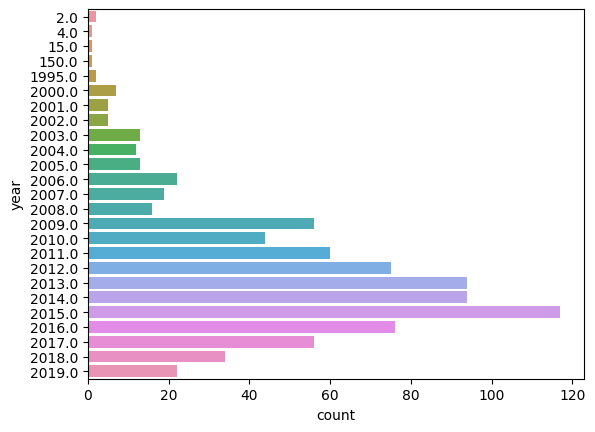

In [17]:
dtt1 = dt_cars.groupby(['year'])["company"].count().reset_index(name="count")
sns.barplot(x='count',y='year', data= dtt1, orient='h' )


Segun el resultado anterior, se puede visualizar que hay años menores a 1995 que no corresponden a datos reales, como año: '150' , '4' , '2', '15'. 

Tambien se puede visualizar que los datos menores a 1995 no tienen un peso importante en la informacion, ya que la mayor cantidad de informacion se encuentra entre los años 2009 y 2019. 

Por lo tanto, se realizará el filtrado de informacion para los años mayores a 1994. 


In [18]:
# Utilizamos la funcion np.where para localizar los datos que sean menor a 1995 y los reemplace por datos tipo 'nan'
dt_cars.year=np.where(dt_cars.year<1995,'nan',dt_cars.year)
# Aplicamos un set para visualizar los datos agropados en la categoria 'year'ArithmeticErrorset(dt_cars['year'])
set(dt_cars['year'])



{'1995.0',
 '2000.0',
 '2001.0',
 '2002.0',
 '2003.0',
 '2004.0',
 '2005.0',
 '2006.0',
 '2007.0',
 '2008.0',
 '2009.0',
 '2010.0',
 '2011.0',
 '2012.0',
 '2013.0',
 '2014.0',
 '2015.0',
 '2016.0',
 '2017.0',
 '2018.0',
 '2019.0',
 'nan'}

### Imputacion predictiva 

Para realizar la imputacion predictiva, primero se identifica cuantos datos son nulos y en que categorias se encuentran para esto se utiliza la funcion isnull() aplicada al dataset. 

In [19]:
# Se identifica el total de datos nulos que tiene cada categoría. 
print('\n Cantidad de Datos Nulos o Nan \n', dt_cars.isnull().sum())


 Cantidad de Datos Nulos o Nan 
 car           0
company       0
year          0
price        35
km_drive     54
fuel_type    55
dtype: int64


Teniendo en cuenta el resultado anterior, se realizará una imputación descriptiva para calcular el valor estimado de los datos que se encuentran vacíos o nulos. Lo anterior, teniendo en cuenta que hay más de 189 datos que se podrían perder si se utilizan las funciones de borrado o filtrado para datos vacíos o nulos como dropna() o dropnull(), lo cual corresponde a más de un 10% del dataset.  

Para tener un mejor cálculo de los datos Nulos en el dataset, se utilizará la función 'IterativeImputer()' de la librería de sklearn. Teniendo en cuenta que esta función solo puede hacer cálculos con datos numéricos, se codificara la columna o categoría 'fuel_type' para asignarles valores numéricos y así incluirla dentro de los parámetros para el cálculo de los datos nulos. 

In [20]:
# Vamos a crear una nueva columna y vamos a asignar valores entre 1 y 3 dependiendo del dato de la columna 'fuel_type'
dt_cars['Fuel']=''
dt_cars['Fuel']=np.where(dt_cars.fuel_type =='Diesel', 1 , np.where(dt_cars.fuel_type =='Petrol',2,3))
dt_cars.head()

,car,company,year,price,km_drive,fuel_type,Fuel
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007.0,80000.0,45000.0,Petrol,2
1,Mahindra Jeep CL550 MDI,Mahindra,2006.0,25000.0,40.0,Diesel,1
2,Maruti Suzuki Alto 800 Vxi,Maruti,2018.0,NaN,22000.0,Petrol,2
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014.0,25000.0,28000.0,Petrol,2
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014.0,75000.0,36000.0,Diesel,1


Teniendo en cuenta el resultado anterior, se tomará los datos numericos relevantes para realizar la imputacion predictiva haciendo uso de la libreria sklear y las funcion IterativeImputer()

In [21]:
# Vamos a aplicar la funcion  IterativeImputer() de sklearn para la imputacion predictiva 
# y calcular los datos faltanes en las columnas mencionadas. 
mice_impute = IterativeImputer()
traindatafill = mice_impute.fit_transform(dt_cars[['price','year','km_drive','Fuel']])
traindatafill= pd.DataFrame(traindatafill)
traindatafill

,0,1,2,3
0,80000.000000,2007.000000,45000.000000,2.0
1,25000.000000,2006.000000,40.000000,1.0
2,52970.364743,2018.000000,22000.000000,2.0
3,25000.000000,2014.000000,28000.000000,2.0
4,75000.000000,2014.000000,36000.000000,1.0
...,...,...,...,...
887,10000.000000,2010.251412,49334.251178,3.0
888,60000.000000,2018.000000,27000.000000,1.0
889,90000.000000,2013.000000,40000.000000,1.0
890,80000.000000,2014.000000,43755.527327,3.0


Se verifica que ya no existan datos nulos en el resultado de la predicción. 

In [22]:
# Verificamos que no hayan nulos en nuestro resultado de imputacion predictiva. 
traindatafill.isnull().sum()

0    0
1    0
2    0
3    0
dtype: int64

In [23]:
# Asignamos las predicciones a cada categoria transformando el numero tipo entero. 
dt_cars['price']= traindatafill[0].astype(int)
dt_cars['year']= traindatafill[1].astype(int)
dt_cars['km_drive']= traindatafill[2].astype(int)
dt_cars['Fuel']= traindatafill[3].astype(int)

dt_cars


,car,company,year,price,km_drive,fuel_type,Fuel
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,80000,45000,Petrol,2
1,Mahindra Jeep CL550 MDI,Mahindra,2006,25000,40,Diesel,1
2,Maruti Suzuki Alto 800 Vxi,Maruti,2018,52970,22000,Petrol,2
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,25000,28000,Petrol,2
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,75000,36000,Diesel,1
...,...,...,...,...,...,...,...
887,Ta,Tara,2010,10000,49334,NaN,3
888,Tata Zest XM Diesel,Tata,2018,60000,27000,Diesel,1
889,Mahindra Quanto C8,Mahindra,2013,90000,40000,Diesel,1
890,Honda Amaze 1.2 E i VTEC,Honda,2014,80000,43755,NaN,3


In [24]:
dt_cars['Fuel_TypeNew']=''
dt_cars['Fuel_TypeNew']=np.where(dt_cars.Fuel == 1,'Diesel' , np.where(dt_cars.Fuel == 2,'Petrol','LPG'))
dt_cars.head()

,car,company,year,price,km_drive,fuel_type,Fuel,Fuel_TypeNew
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,80000,45000,Petrol,2,Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,25000,40,Diesel,1,Diesel
2,Maruti Suzuki Alto 800 Vxi,Maruti,2018,52970,22000,Petrol,2,Petrol
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,25000,28000,Petrol,2,Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,75000,36000,Diesel,1,Diesel


In [25]:
dt_cars= dt_cars.drop(columns='fuel_type')
dt_cars

,car,company,year,price,km_drive,Fuel,Fuel_TypeNew
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,80000,45000,2,Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,25000,40,1,Diesel
2,Maruti Suzuki Alto 800 Vxi,Maruti,2018,52970,22000,2,Petrol
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,25000,28000,2,Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,75000,36000,1,Diesel
...,...,...,...,...,...,...,...
887,Ta,Tara,2010,10000,49334,3,LPG
888,Tata Zest XM Diesel,Tata,2018,60000,27000,1,Diesel
889,Mahindra Quanto C8,Mahindra,2013,90000,40000,1,Diesel
890,Honda Amaze 1.2 E i VTEC,Honda,2014,80000,43755,3,LPG


Una vez se asignan los valores de la imputacion predictiva a cada categoria, se verificará la distribucion de los datos para visualizar si los datos originales mantenen la misma relacion con los datos calculados por la imputacion predictiva. Para realizar esto se usarán las librerias de matplotlib. 

<Figure size 1200x1400 with 0 Axes>

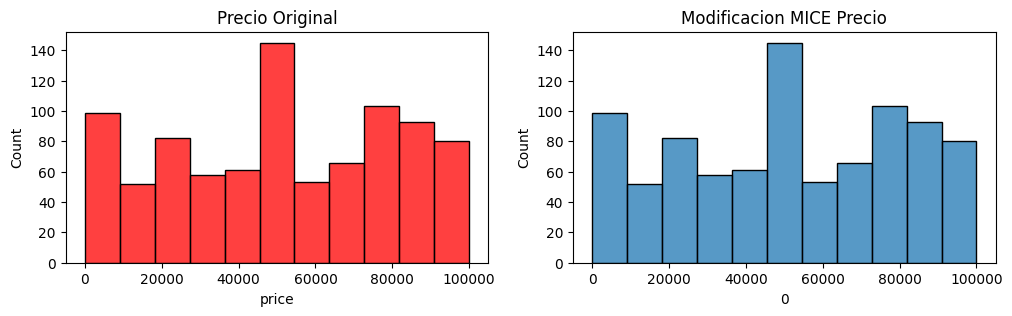

<Figure size 1200x1400 with 0 Axes>

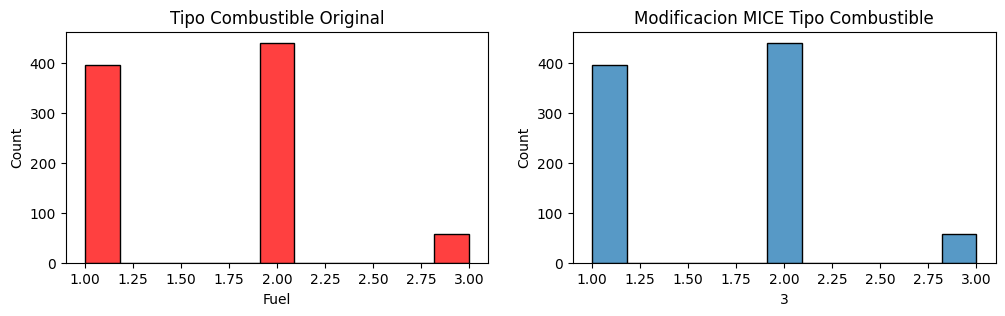

<Figure size 1200x1400 with 0 Axes>

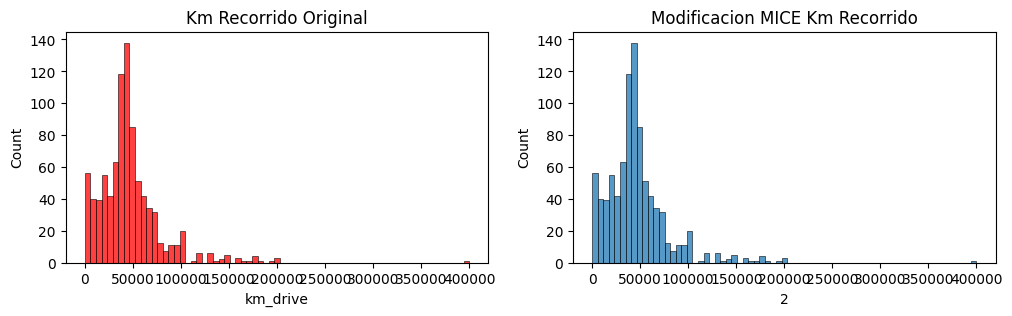

<Figure size 1200x1400 with 0 Axes>

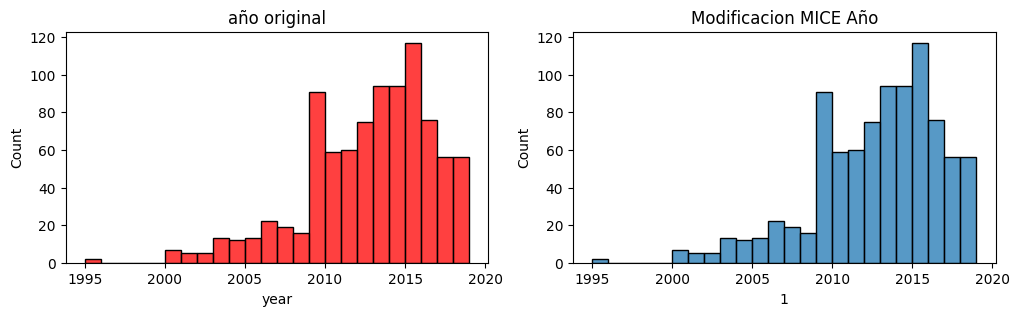

<Figure size 1200x1400 with 0 Axes>

In [26]:
# Comparacion de categoria Precio
plt.figure(figsize=(12,3)) 
plt.subplot(121)
sns.histplot(dt_cars.price, color='r')
plt.title('Precio Original')
plt.subplot(122)
sns.histplot(traindatafill[0])
plt.title('Modificacion MICE Precio')
plt.figure(figsize=(12,14))

# Comparancion de categoria Tipo de combustible 
plt.figure(figsize=(12,3)) 
plt.subplot(121)
sns.histplot(dt_cars.Fuel, color='r')
plt.title('Tipo Combustible Original')
plt.subplot(122)
sns.histplot(traindatafill[3])
plt.title('Modificacion MICE Tipo Combustible')
plt.figure(figsize=(12,14))

# Comparacion de categoria Kilometro recorridos
plt.figure(figsize=(12,3)) 
plt.subplot(121)
sns.histplot(dt_cars.km_drive, color='r')
plt.title('Km Recorrido Original')
plt.subplot(122)
sns.histplot(traindatafill[2])
plt.title('Modificacion MICE Km Recorrido')
plt.figure(figsize=(12,14))

# Comparacion de categoria año Year
plt.figure(figsize=(12,3)) 
plt.subplot(121)
sns.histplot(dt_cars.year, color='r')
plt.title('año original')
plt.subplot(122)
sns.histplot(traindatafill[1])
plt.title('Modificacion MICE Año')
plt.figure(figsize=(12,14))


Como se muestra en las graficas anteriores, los datos originales vs los datos calculados con la imputacion predictiva se mantienen la  misma distribuscion. Por lo tanto, se podran iniciar al analisis descritivo del nuevo dataset

In [27]:
dt_car1=dt_cars.copy()

## Analisis descriptivo

Se realizará el analisis descriptivo para el dataset teniendo en cuenta las variables numericas y categorica. Para esto se usaran varias funciones estadisticas de la libreria numpy y matplotlib. 

A continuación se muestra las marcas mas vendidas del dataset. 

<function matplotlib.pyplot.show(close=None, block=None)>

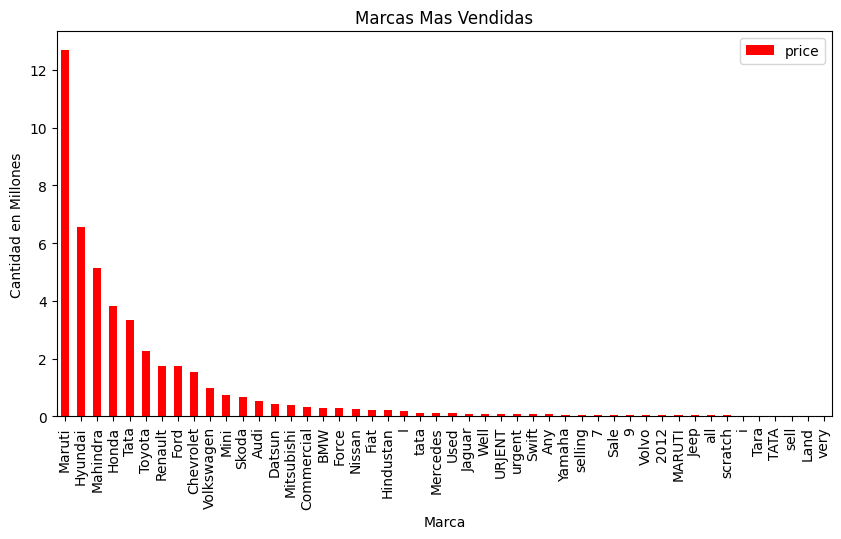

In [28]:
dt2= dt_car1.pivot_table(index='company', values='price', aggfunc='sum')/1000000
ax = dt2.sort_values('price',ascending = False).plot.bar(color='r',figsize=(10,5))
ax.set_title('Marcas Mas Vendidas')
ax.set_ylabel('Cantidad en Millones')
ax.set_xlabel('Marca')
plt.show


<function matplotlib.pyplot.show(close=None, block=None)>

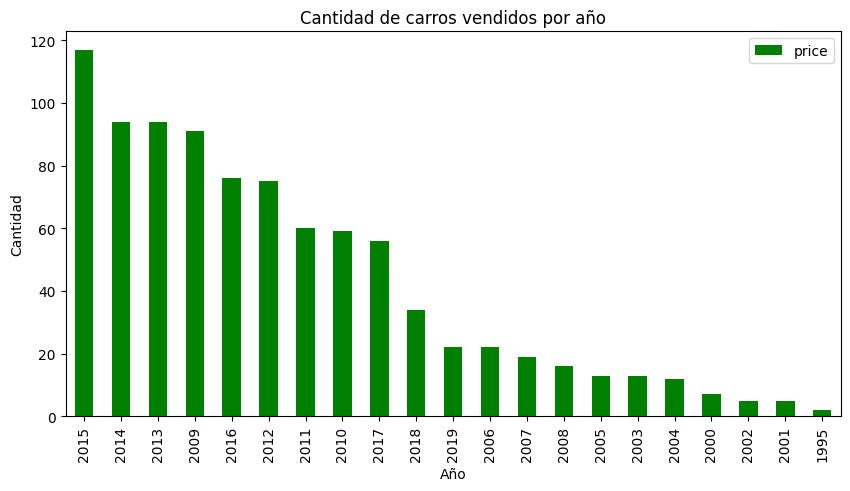

In [29]:
dt3=dt_car1.pivot_table(index=['year'], values=['price'], aggfunc='count')
#print(dt3.sort_values('price',ascending= False))
ax = dt3.sort_values('price',ascending = False).plot.bar(color='g',figsize=(10,5))
ax.set_title('Cantidad de carros vendidos por año')
ax.set_ylabel('Cantidad')
ax.set_xlabel('Año')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

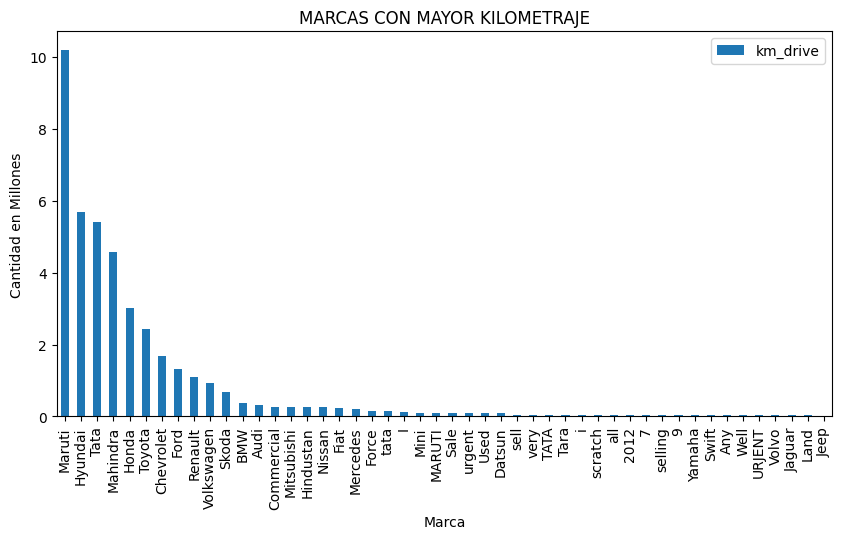

In [30]:
dt4=dt_car1.pivot_table(index='company', values='km_drive', aggfunc='sum')/1000000
#print(dt4.sort_values('km_drive',ascending= False))
ax = dt4.sort_values('km_drive',ascending = False).plot.bar(figsize=(10,5))
ax.set_title('MARCAS CON MAYOR KILOMETRAJE')
ax.set_ylabel('Cantidad en Millones')
ax.set_xlabel('Marca')
plt.show

## Modificando data frame para agregar datos

A continuación, vamos a agregar datos aleatorios en una nueva columna de nuestro data frame, para esto utilizaremos las librerías random y las funciones lambda y np.where. Las nuevas columnas tendran los datos de EDAD, PROFESION, ESTADO CIVIL Y SEXO

In [31]:
ciudades= ['bogota', 'medellin', 'cali', 'barranquilla', 'bucaramanga']
tipo_e= ['soltero', 'casado']
tipo_p = ['ingeniero', 'abogado', 'medico', 'profesor']
dt_car1['sex']=''
dt_car1[['edad','ciudad','estado','profesion']]=''
dt_car1['sex']=dt_car1['sex'].apply(lambda x: random.randint(0,1))
dt_car1['sex']=np.where(dt_car1.sex ==1, 'hombre','mujer')
dt_car1['ciudad']=dt_car1['ciudad'].apply(lambda x: random.choice(ciudades))
dt_car1['edad']=dt_car1['edad'].apply(lambda x: random.randint(18,70))
dt_car1['estado']=dt_car1['estado'].apply(lambda x: random.choice(tipo_e))
dt_car1['profesion']=np.where(dt_car1.edad < 21, 'estudiante', dt_car1['profesion'].apply(lambda x: random.choice(tipo_p)))
dt_car1


,car,company,year,price,km_drive,Fuel,Fuel_TypeNew,sex,edad,ciudad,estado,profesion
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,80000,45000,2,Petrol,hombre,48,bucaramanga,casado,medico
1,Mahindra Jeep CL550 MDI,Mahindra,2006,25000,40,1,Diesel,mujer,44,medellin,soltero,medico
2,Maruti Suzuki Alto 800 Vxi,Maruti,2018,52970,22000,2,Petrol,hombre,23,medellin,casado,medico
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,25000,28000,2,Petrol,mujer,24,bucaramanga,casado,medico
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,75000,36000,1,Diesel,mujer,33,cali,soltero,medico
...,...,...,...,...,...,...,...,...,...,...,...,...
887,Ta,Tara,2010,10000,49334,3,LPG,mujer,58,bogota,soltero,abogado
888,Tata Zest XM Diesel,Tata,2018,60000,27000,1,Diesel,hombre,54,medellin,soltero,medico
889,Mahindra Quanto C8,Mahindra,2013,90000,40000,1,Diesel,mujer,69,barranquilla,casado,medico
890,Honda Amaze 1.2 E i VTEC,Honda,2014,80000,43755,3,LPG,mujer,59,bucaramanga,soltero,medico


In [32]:
dt_car2= dt_car1.copy()
dt_car2

,car,company,year,price,km_drive,Fuel,Fuel_TypeNew,sex,edad,ciudad,estado,profesion
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,80000,45000,2,Petrol,hombre,48,bucaramanga,casado,medico
1,Mahindra Jeep CL550 MDI,Mahindra,2006,25000,40,1,Diesel,mujer,44,medellin,soltero,medico
2,Maruti Suzuki Alto 800 Vxi,Maruti,2018,52970,22000,2,Petrol,hombre,23,medellin,casado,medico
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,25000,28000,2,Petrol,mujer,24,bucaramanga,casado,medico
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,75000,36000,1,Diesel,mujer,33,cali,soltero,medico
...,...,...,...,...,...,...,...,...,...,...,...,...
887,Ta,Tara,2010,10000,49334,3,LPG,mujer,58,bogota,soltero,abogado
888,Tata Zest XM Diesel,Tata,2018,60000,27000,1,Diesel,hombre,54,medellin,soltero,medico
889,Mahindra Quanto C8,Mahindra,2013,90000,40000,1,Diesel,mujer,69,barranquilla,casado,medico
890,Honda Amaze 1.2 E i VTEC,Honda,2014,80000,43755,3,LPG,mujer,59,bucaramanga,soltero,medico


In [33]:
dt_car2.groupby(["company","profesion",'edad'])["car"].count().reset_index(name="count").\
    sort_values(by="count", ascending = False).reset_index(drop=True)

,company,profesion,edad,count
0,Maruti,estudiante,18,6
1,Maruti,medico,54,5
2,Ford,estudiante,18,5
3,Maruti,ingeniero,59,4
4,Maruti,profesor,50,4
...,...,...,...,...
687,Hyundai,profesor,43,1
688,Hyundai,profesor,45,1
689,Hyundai,profesor,46,1
690,Hyundai,profesor,47,1


<function matplotlib.pyplot.show(close=None, block=None)>

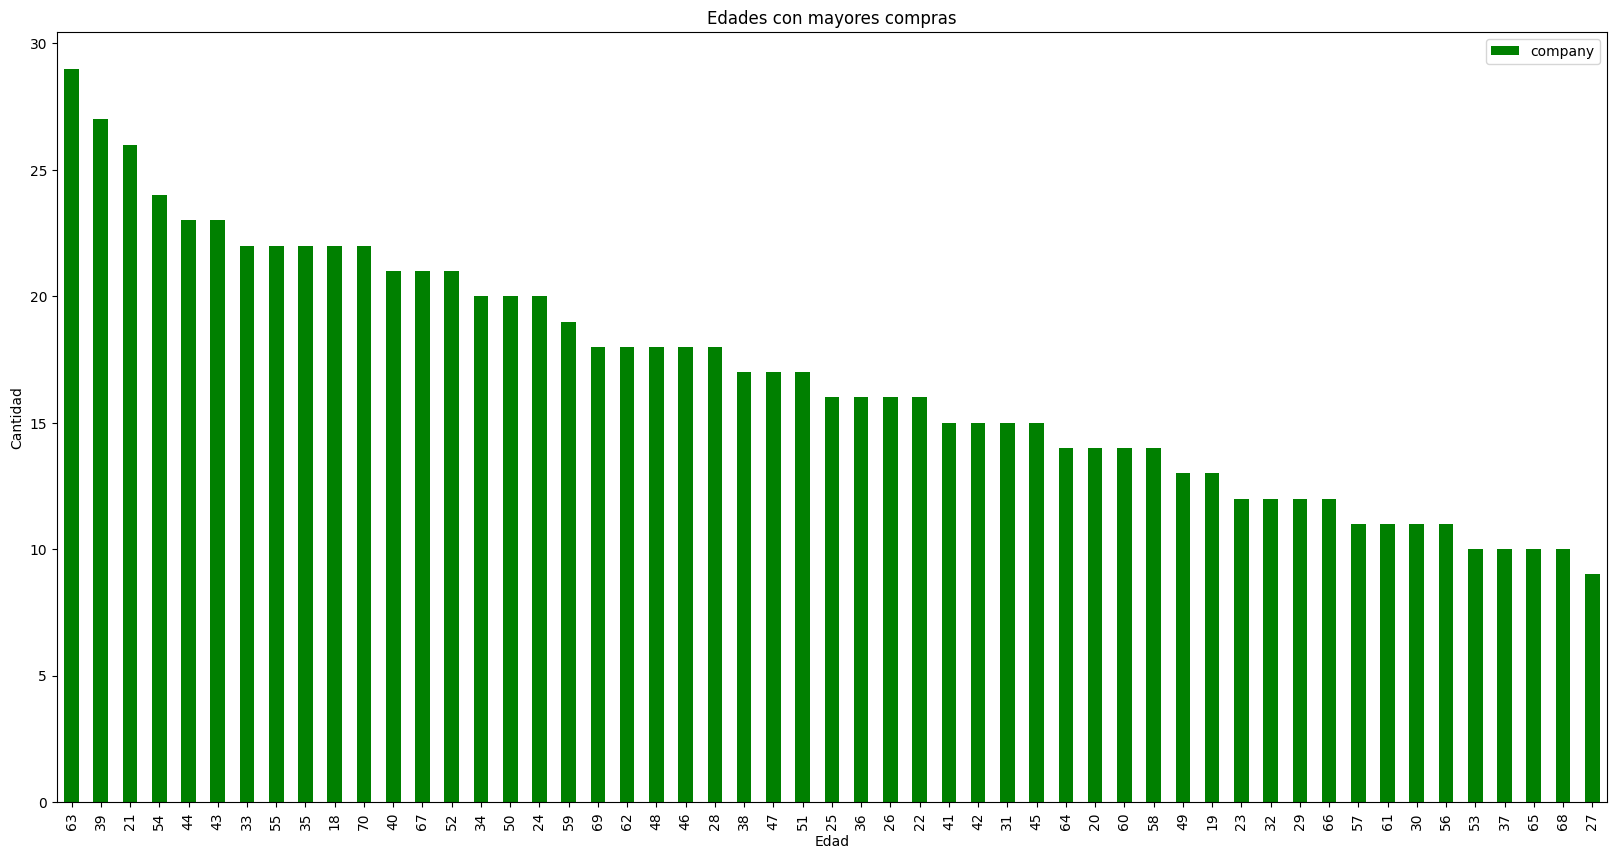

In [34]:
dt5=dt_car2.pivot_table(index='edad', values='company', aggfunc='count')
#print(dt4.sort_values('km_drive',ascending= False))
ax = dt5.sort_values('company',ascending = False).plot.bar(figsize=(20,10),color='g')
ax.set_title('Edades con mayores compras')
ax.set_ylabel('Cantidad')
ax.set_xlabel('Edad')
plt.show


<function matplotlib.pyplot.show(close=None, block=None)>

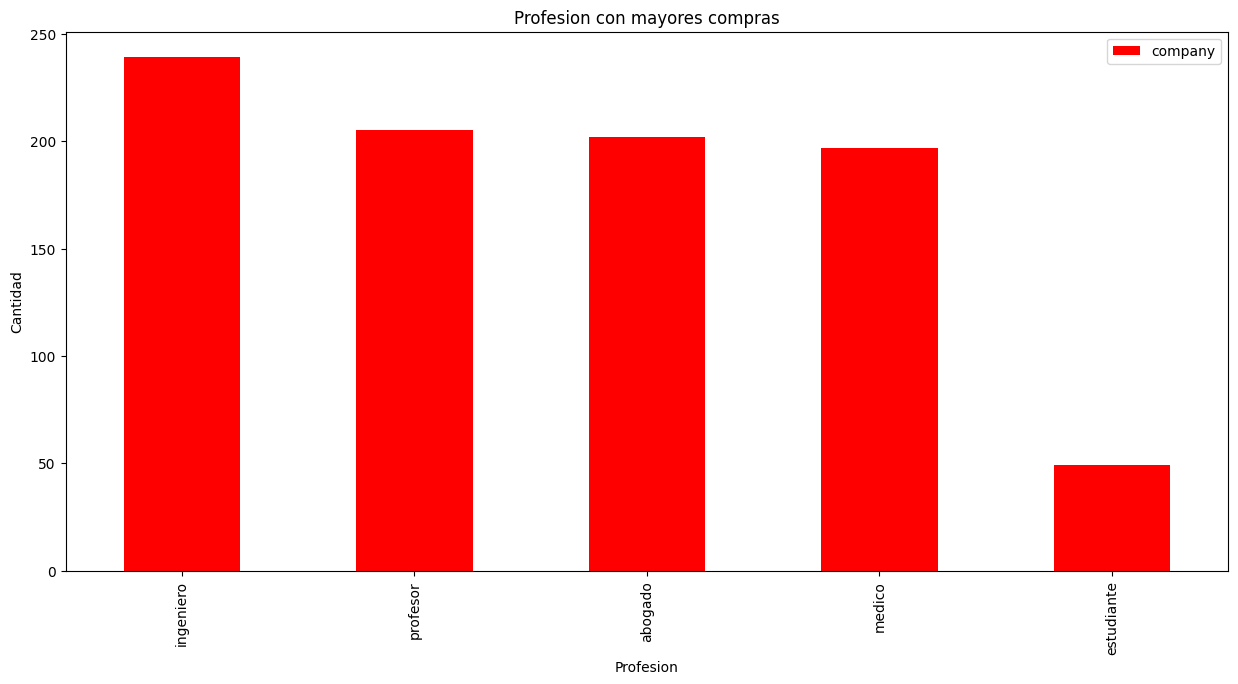

In [35]:
dt6=dt_car2.pivot_table(index='profesion', values='company', aggfunc='count')
#print(dt4.sort_values('km_drive',ascending= False))
ax = dt6.sort_values('company',ascending = False).plot.bar(figsize=(15,7),color='r')
ax.set_title('Profesion con mayores compras')
ax.set_ylabel('Cantidad')
ax.set_xlabel('Profesion')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

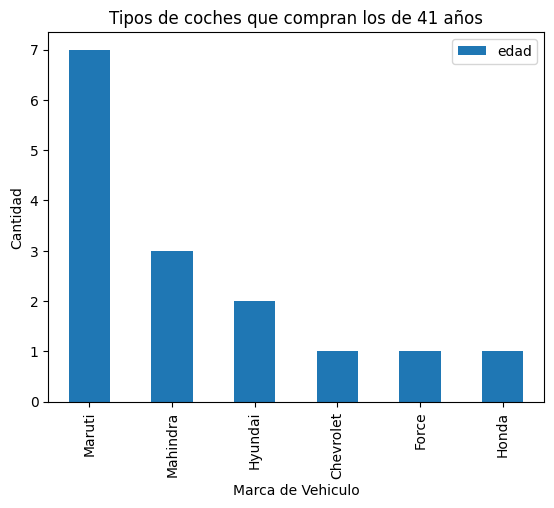

In [36]:
dt7=dt_car2[dt_car2['edad']==41].loc[:,['company','edad']]
ax = dt7.groupby(by=['company']).count().sort_values('edad',ascending=False).plot.bar()
ax.set_title('Tipos de coches que compran los de 41 años')
ax.set_ylabel('Cantidad')
ax.set_xlabel('Marca de Vehiculo')
plt.show

## MODELO MACHINE LEARNING NO SUPERVISADO

Para aplicar el modelo primero vamos hacer una verificacion de datos, inicialmente verificamos que en nuestro data set no existan valores nullos debido a que el modelo no puede clasificar si tiene valores nulos especiamente no se podran realizar las operaciones de matrices si se encuentran valores nulos. 

In [37]:
dt_car2

,car,company,year,price,km_drive,Fuel,Fuel_TypeNew,sex,edad,ciudad,estado,profesion
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,80000,45000,2,Petrol,hombre,48,bucaramanga,casado,medico
1,Mahindra Jeep CL550 MDI,Mahindra,2006,25000,40,1,Diesel,mujer,44,medellin,soltero,medico
2,Maruti Suzuki Alto 800 Vxi,Maruti,2018,52970,22000,2,Petrol,hombre,23,medellin,casado,medico
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,25000,28000,2,Petrol,mujer,24,bucaramanga,casado,medico
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,75000,36000,1,Diesel,mujer,33,cali,soltero,medico
...,...,...,...,...,...,...,...,...,...,...,...,...
887,Ta,Tara,2010,10000,49334,3,LPG,mujer,58,bogota,soltero,abogado
888,Tata Zest XM Diesel,Tata,2018,60000,27000,1,Diesel,hombre,54,medellin,soltero,medico
889,Mahindra Quanto C8,Mahindra,2013,90000,40000,1,Diesel,mujer,69,barranquilla,casado,medico
890,Honda Amaze 1.2 E i VTEC,Honda,2014,80000,43755,3,LPG,mujer,59,bucaramanga,soltero,medico


In [38]:
dt_car2.isnull().sum()

car             0
company         0
year            0
price           0
km_drive        0
Fuel            0
Fuel_TypeNew    0
sex             0
edad            0
ciudad          0
estado          0
profesion       0
dtype: int64

Como se muestra en el resultado anterior, el nuevo data set ya no tiene datos nulos. Por lo tanto, se comenzara aplicar el modelo para resolver la problematica. 

A continuacion se hara una breve descripcion de los datos en funcion de cada una de sus categorias con el fin de identificar la estructura de los mismos. 

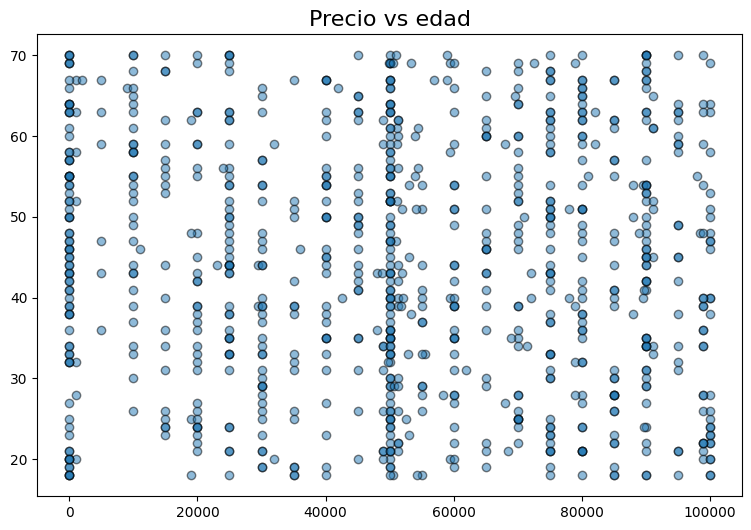

In [39]:
f = plt.figure(figsize=(20,6))
fig = plt.subplot(121)
plt.scatter(dt_car2['price'], dt_car2['edad'], edgecolor='k', alpha=0.5)
plt.title('Precio vs edad', fontsize=16)

'''fig = plt.subplot(122)
plt.scatter(dt_car2['price'],dt_car2['km_drive'], edgecolor='b', alpha=0.5)
plt.title('Precio vs  km recorrido', fontsize=16)'''

plt.show()


Teniendo en cuenta el resultado anterior, aunque la distribucion de la informacion es demasiado dispersa, se puede visualizar de 3 a 4 grupos, estos grupos se pueden dividir de la siguiente manera: 

1. Personas entre los 30 y 50 años que compran carros entre los 5000 a 20000 dolares
2. Personas entre los 20 y los 40 años que compran carros entre los 50.000 a 60.000 dolares 
3. Personas entre los 50 y 80 que compran carros entre los 80.000 a 100.000 dolares. 

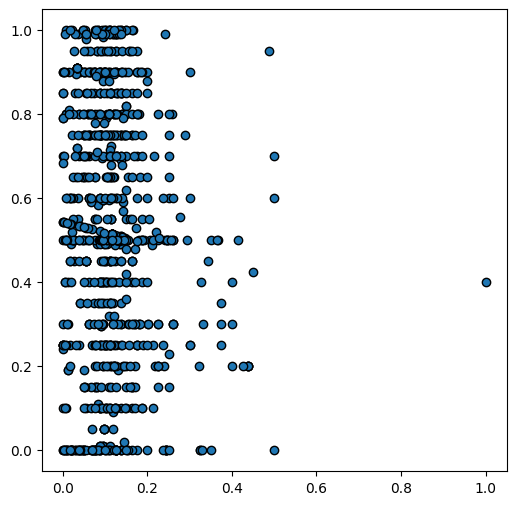

In [40]:
def normalize(df):
    result = df.copy()
    for feature_name in df.columns:
        max_val = df[feature_name].max()
        min_val = df[feature_name].min()
        result[feature_name] = (df[feature_name] - min_val) / (max_val - min_val)
    return result

# Crear el nuevo dataframe con la data normalizada
df_new_1 = normalize(dt_car2[['edad','price','km_drive','year']])

plt.figure(figsize=(6, 6))
plt.scatter(df_new_1['km_drive'], df_new_1['price'], edgecolor='k')
plt.show()


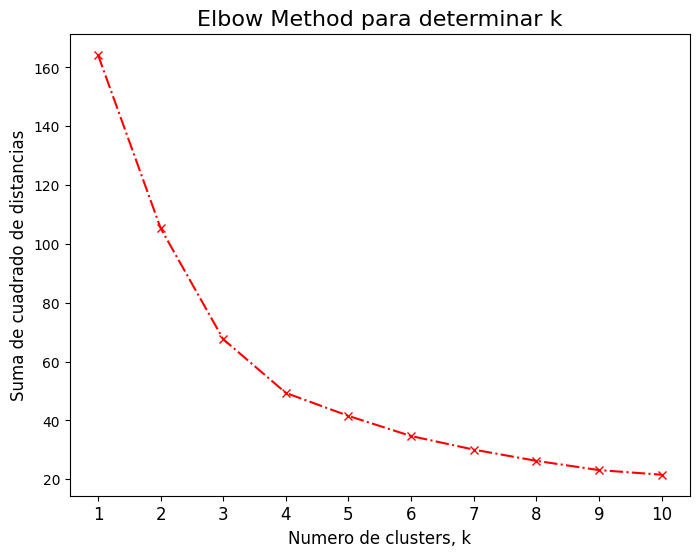

In [41]:
sum_sq_d = []
K = range(1,11)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(df_new_1[['price','km_drive','edad']])
    sum_sq_d.append(km.inertia_)
plt.figure(figsize=(8,6))
plt.plot(K, sum_sq_d, 'rx-.')
plt.xlabel('Numero de clusters, k', fontsize=12)
plt.ylabel('Suma de cuadrado de distancias', fontsize=12)
plt.title('Elbow Method para determinar k', fontsize=16)
plt.xticks(range(1,11), fontsize=12)
plt.show()

Centroides iniciales (income, claims) son: 
 {1: [1, 0], 2: [2, 0], 3: [1, 3]}


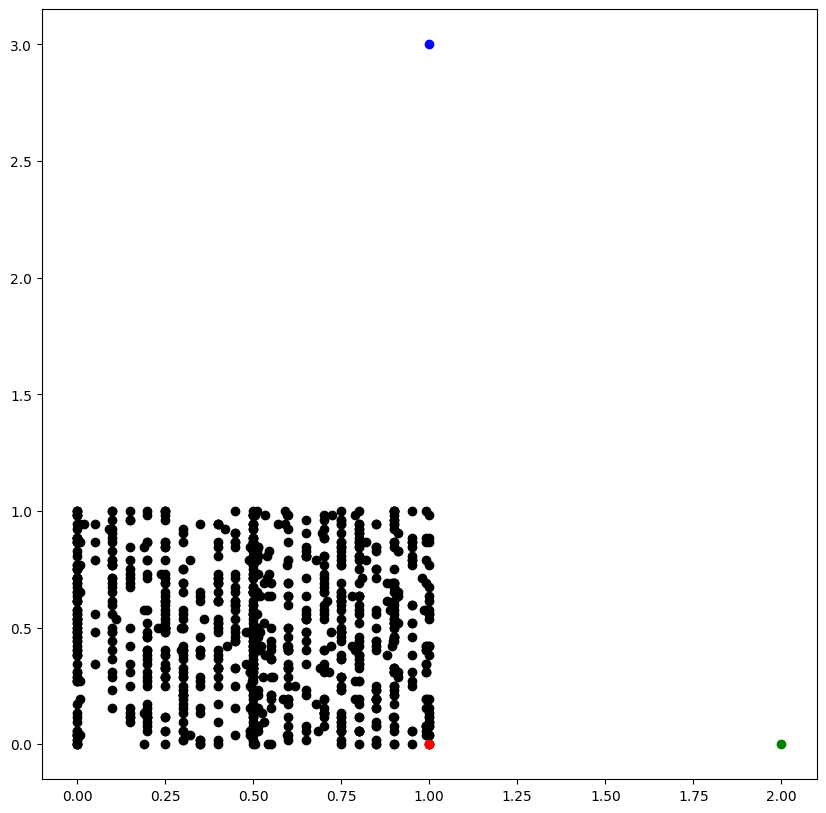

In [42]:
k = 3

# Eleccion manual de coordenadas
data_range_x = [0,1,2,3]
data_range_y = [0,1,2,3]

centroids = {i+1: [np.random.choice(data_range_x), 
                   np.random.choice(data_range_y)] for i in range(k)}

print("Centroides iniciales (income, claims) son: \n" ,
      centroids)
fig = plt.figure(figsize=(10, 10))
plt.scatter(df_new_1['price'], df_new_1['edad'], color='k')
colour_map_1 = {1: 'r', 2: 'g', 3: 'b' , 4:'c', 5:'y'}
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colour_map_1[i])
'''plt.xlabel('Income', fontsize=12)
plt.ylabel('Claims', fontsize=12)
plt.xlim(-1.5,2.5)
plt.ylim(-1.5,2.5)'''
plt.show()

In [43]:
k = 3
kmeans = KMeans(n_clusters=k,init='k-means++')
kmeans.fit(df_new_1)

KMeans(n_clusters=3)

In [44]:
labels = kmeans.predict(df_new_1)
labels[0:5]

array([1, 2, 0, 2, 0])

In [45]:
centroids = kmeans.cluster_centers_
centroids

array([[0.23280979, 0.67682008, 0.11075347, 0.71958735],
       [0.76185553, 0.70725334, 0.1091893 , 0.70848268],
       [0.5307565 , 0.16716276, 0.12501109, 0.7388245 ]])

In [46]:
df_new_1

,edad,price,km_drive,year
0,0.576923,0.800008,0.112500,0.500000
1,0.500000,0.250003,0.000100,0.458333
2,0.096154,0.529705,0.055000,0.958333
3,0.115385,0.250003,0.070000,0.791667
4,0.288462,0.750008,0.090000,0.791667
...,...,...,...,...
887,0.769231,0.100001,0.123335,0.625000
888,0.692308,0.600006,0.067500,0.958333
889,0.980769,0.900009,0.100000,0.750000
890,0.788462,0.800008,0.109387,0.791667


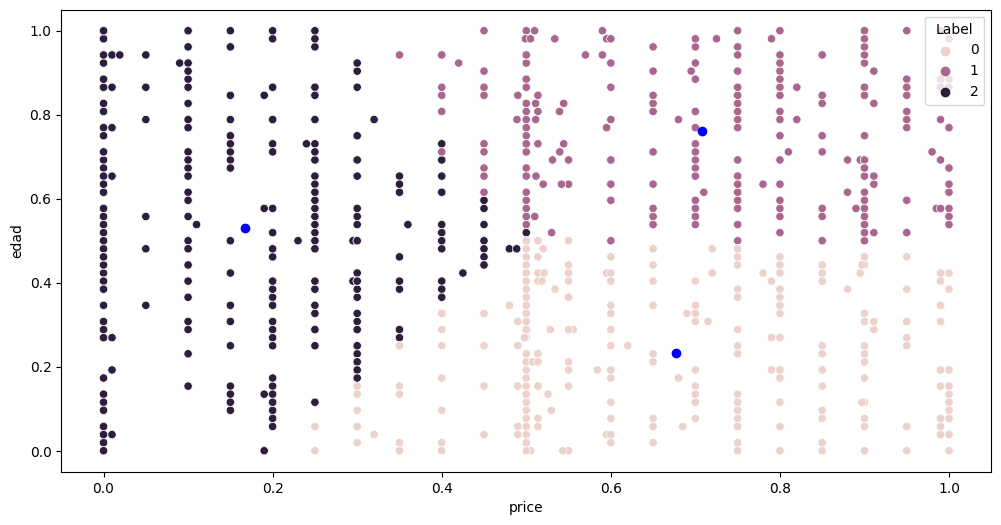

'array([[0.76380167, 0.7231572 , 0.10693901, 0.71371882],\n       [0.5185464 , 0.15115471, 0.12282001, 0.73947212],\n       [0.24041495, 0.64105739, 0.11580128, 0.71595689]])'

In [47]:

dt=df_new_1.copy()
dt['Label']=labels
import seaborn as sns 
plt.figure(figsize=(12,6))
sns.scatterplot(x='price',y='edad',hue='Label',data=dt)
plt.scatter(x=0.67682008, y=0.23280979,color='blue')
plt.scatter(x=0.70725334, y=0.76185553,color='blue')
plt.scatter(x=0.16716276, y=0.5307565 ,color='blue')



plt.show()


'''array([[0.76380167, 0.7231572 , 0.10693901, 0.71371882],
       [0.5185464 , 0.15115471, 0.12282001, 0.73947212],
       [0.24041495, 0.64105739, 0.11580128, 0.71595689]])'''

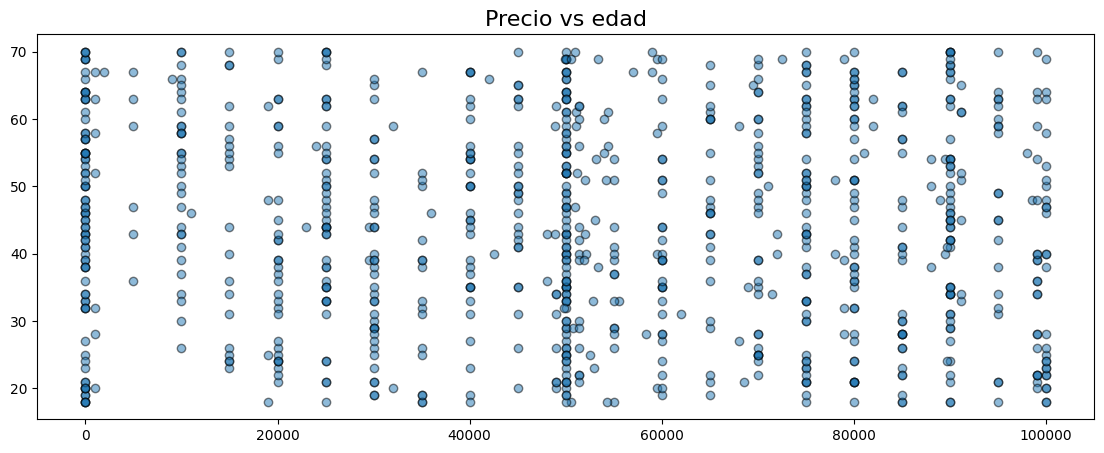

In [48]:
f = plt.figure(figsize=(30,5)) 

fig = plt.subplot(121)
plt.scatter(dt_car2['price'], dt_car2['edad'], edgecolor='k', alpha=0.5)
plt.title('Precio vs edad', fontsize=16)

'''fig = plt.subplot(122)
plt.scatter(dt_car2['price'],dt_car2['km_drive'], edgecolor='b', alpha=0.5)
plt.title('Precio vs  km recorrido', fontsize=16)'''
plt.show()

## Concluciones 

Segun el resulatdo anterior, se muestra que el algoritmo clasifica 3 grupos para la relacion entre el precio y la edad. 

Algo muy parecido a la aproximacion incial, aqui se visualiza 3 grupos que pueden clasificarse de la siguiente manera: 

1. Un grupo grande donde la mayoria de personas entre los 20 a 60 años compran carros menores a 40.000 dolares. 

2. Un grupo mediano donde personas menores a 40 años compran vehiculos entre los 35.000 a los 90.000 dolares. 

3. Un grupo mediano donde las personas mayores de 50 años compran vehiculos entre los 50.000 a los 80.000 dolares. 

1. Se requiere de más fuentes de información y una densidad más alta de datos para poder realizar modelos de Machine Learning no supervisado más efectivos. 

2. Para este caso en especifico con el algoritmo de K-means es suficiente para predecir nichos de clientes interesados en ventas. 

3. Es importante limpiar la información y tener en cuenta no eliminar los datos nullos cuando se tiene una densidad baja de datos. 